In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
import os,sys
opj = os.path.join
from copy import deepcopy
import pickle as pkl

sys.path.append('../../src')
sys.path.append('../../src/vae/models')
sys.path.append('../../src/dsets/cosmology')
from dset import get_dataloader
from losses import _reconstruction_loss
from viz import viz_im_r, cshow, viz_filters
from sim_cosmology import p, load_dataloader_and_pretrained_model

# trim modules
sys.path.append('../../lib/trim')
from trim import TrimModel

# wt modules
from wavelet_transform import Wavelet_Transform, Attributer, get_2dfilts
from utils import tuple_L1Loss, tuple_L2Loss, thresh_attrs, viz_list
from pytorch_wavelets import DTCWTForward, DTCWTInverse, DWTForward, DWTInverse
import pywt

In [2]:
# get dataloader and model
train_loader, model = load_dataloader_and_pretrained_model(p)

In [8]:
# input
torch.manual_seed(p.seed)
x = iter(train_loader).next()[0][0:2].to(device)

# wavelet transform with initialization
wt = Wavelet_Transform(biort='near_sym_b', qshift='qshift_b', J=3)
(fl_filt_reals, fl_filt_imags), (sl_filt_reals, sl_filt_imags) = get_2dfilts(wt, wt_type='DTCWT')

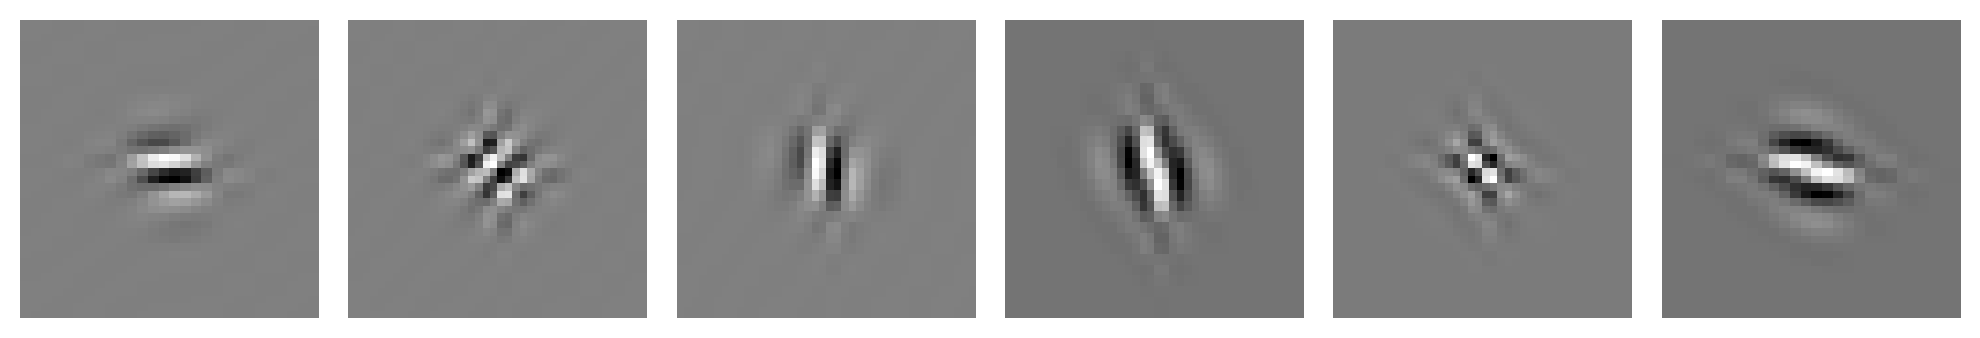

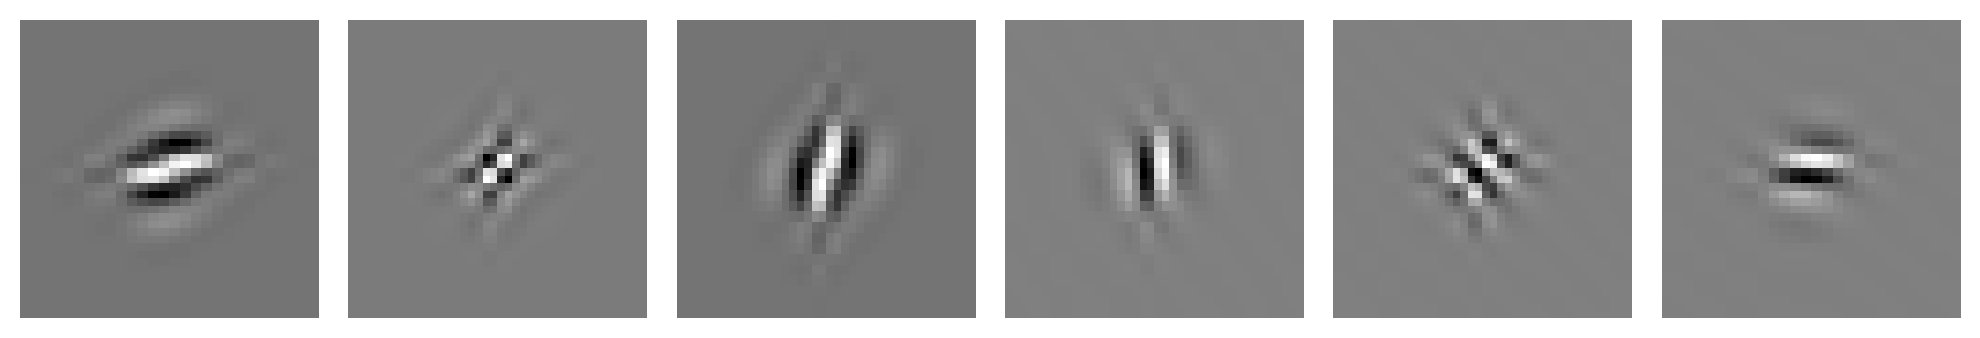

In [9]:
viz_list(fl_filt_reals)
viz_list(fl_filt_imags)

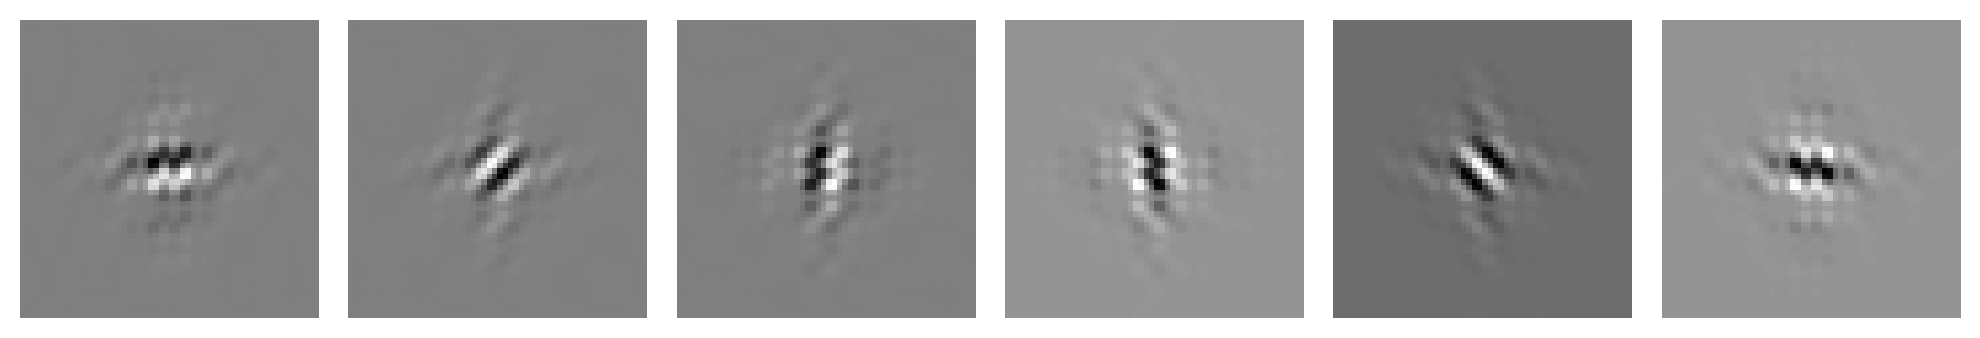

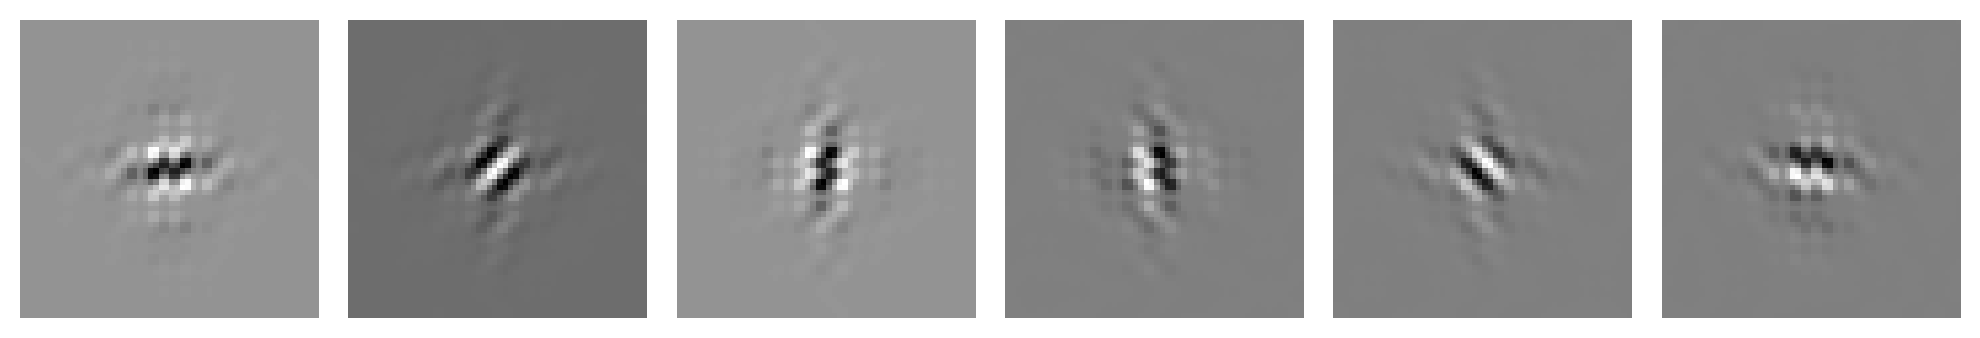

In [10]:
viz_list(sl_filt_reals)
viz_list(sl_filt_imags)

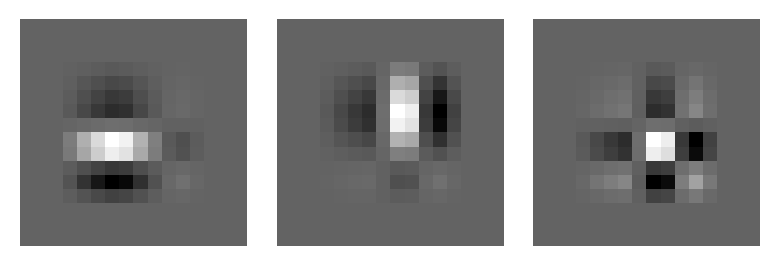

In [11]:
wt = Wavelet_Transform(wt_type='DWT', wave='db2', mode='symmetric', J=3) 
filt = get_2dfilts(wt, wt_type='DWT')
viz_list(filt, figsize=(4,4))
